It looks like you’re describing a classic SIR (Susceptible-Infectious-Recovered) model. Here’s how you can set up and solve these differential equations using `solve_ivp` and plot the results with `matplotlib`.

Here are the equations:
Here are the equations:

$$
\frac{dS}{dt} = -\beta SI
$$

$$
\frac{dI}{dt} = \beta SI - \gamma I
$$

$$
\frac{dR}{dt} = \gamma I
$$

Where:
- \(S\) is the number of susceptible individuals,
- \(I\) is the number of infectious individuals,
- \(R\) is the number of recovered individuals,
- \($\beta$\) is the rate of infection per susceptible and infectious individual,
- \($\gamma$\) is the rate of recovery per infectious individual.

Here’s a complete example code to solve and plot these equations:

Here’s a complete example code to solve and plot these equations:

### Key Points:
1. **`sir_model` Function**: Defines the differential equations based on the SIR model.
2. **`solve_ivp`**: Solves these differential equations over the specified time span.
3. **`np.arange`**: Generates time points where the solution is evaluated.
4. **Plotting**: Shows the number of susceptible, infectious, and recovered individuals over time.

This code will plot the number of susceptible, infectious, and recovered individuals over time based on the SIR model. Adjust `beta`, `gamma`, and initial conditions as needed for your scenario.

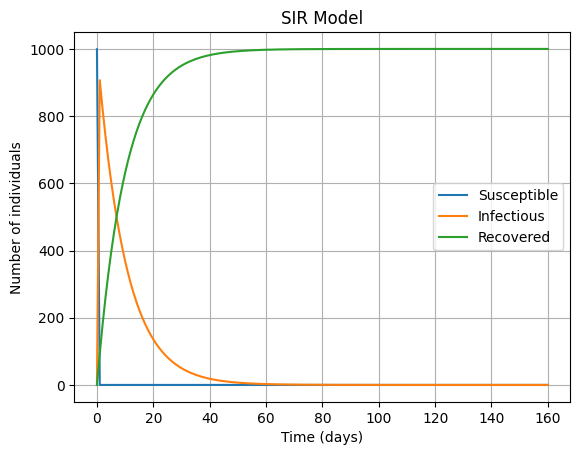

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Initial parameters
beta = 0.3  # Rate of infection per susceptible and infectious individual
gamma = 0.1  # Rate of recovery per infectious individual
initial_susceptible = 999
initial_infectious = 1
initial_recovered = 0
initial_conditions = [initial_susceptible, initial_infectious, initial_recovered]
time_span = [0, 160]  # Time from 0 to 160 days
step_size = 1

# SIR model differential equations
def sir_model(t, y, beta, gamma):
    S, I, R = y
    dS = -beta * S * I
    dI = beta * S * I - gamma * I
    dR = gamma * I
    return [dS, dI, dR]

# Solve the differential equations
solution = solve_ivp(
    fun=lambda t, y: sir_model(t, y, beta, gamma),
    t_span=time_span,
    y0=initial_conditions,
    t_eval=np.arange(time_span[0], time_span[1] + step_size, step_size)
)

# Plot the solution
fig, ax = plt.subplots()
ax.plot(solution.t, solution.y[0], label='Susceptible')
ax.plot(solution.t, solution.y[1], label='Infectious')
ax.plot(solution.t, solution.y[2], label='Recovered')
ax.set(xlabel='Time (days)', ylabel='Number of individuals', title='SIR Model')
ax.legend()
ax.grid()
plt.show()


Here are the equations:

$$
\frac{dS}{dt} = -\beta SI
$$

$$
\frac{dI}{dt} = \beta SI - \gamma I
$$

$$
\frac{dR}{dt} = \gamma I
$$

Using data from an influenza outbreak at a British boarding school with \( N = 763 \) students, parameters \( \beta_f \) and \( \gamma \) were estimated as follows:

- \( $\gamma$ = 0.44 \)
- \( $\beta_f$ = 1.67 \)

To convert \( $\beta_f$ \) to \( $\beta$ \):

$$
\beta = \frac{\beta_f}{N} = \frac{1.67}{763} = 2.18 \times 10^{-3}
$$

For initial conditions, we assume the outbreak started with a single infectious individual at \( t = 0 \), so:

- \( I(0) = 1 \)
- \( S(0) = 762 \)

Here’s a complete example code to solve and plot these equations:


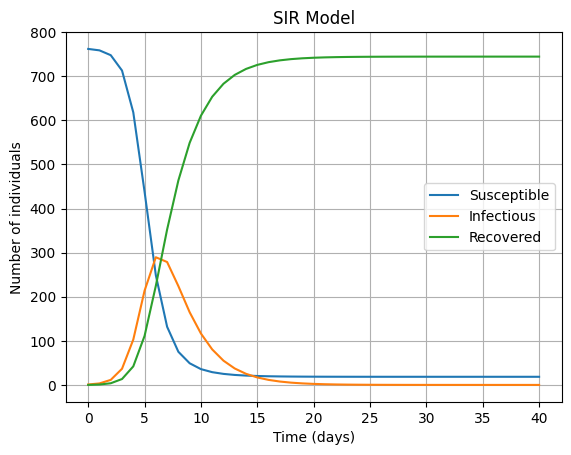

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
N = 763  # Total population
beta_f = 1.67  # Initial infection rate
gamma = 0.44  # Recovery rate

# Convert beta_f to beta
beta = beta_f / N

# Initial conditions
initial_susceptible = N - 1  # S(0)
initial_infectious = 1       # I(0)
initial_recovered = 0        # R(0)
initial_conditions = [initial_susceptible, initial_infectious, initial_recovered]

# Time span and step size
time_span = [0, 40]  # Time from 0 to 40 days
step_size = 1

# SIR model differential equations
def sir_model(t, y, beta, gamma):
    S, I, R = y
    dS = -beta * S * I
    dI = beta * S * I - gamma * I
    dR = gamma * I
    return [dS, dI, dR]

# Solve the differential equations
solution = solve_ivp(
    fun=lambda t, y: sir_model(t, y, beta, gamma),
    t_span=time_span,
    y0=initial_conditions,
    t_eval=np.arange(time_span[0], time_span[1] + step_size, step_size)
)

# Plot the solution
fig, ax = plt.subplots()
ax.plot(solution.t, solution.y[0], label='Susceptible')
ax.plot(solution.t, solution.y[1], label='Infectious')
ax.plot(solution.t, solution.y[2], label='Recovered')
ax.set(xlabel='Time (days)', ylabel='Number of individuals', title='SIR Model')
ax.legend()
ax.grid()
plt.show()


To incorporate birth and death rates into the SIR model, you'll need to adjust the differential equations to include these factors. Here’s how you can modify the equations and the code:

### Modified Differential Equations
1. **Susceptible individuals**:
   
   $$
   \frac{dS}{dt} = bN - \beta SI - aS
   $$
   
2. **Infectious individuals**:
   
   $$
   \frac{dI}{dt} = \beta SI - \gamma I - aI
   $$
   
3. **Recovered individuals**:
   
   $$
   \frac{dR}{dt} = \gamma I - aR
   $$
   
4. **Total population** \( N(t) = S(t) + I(t) + R(t) \):
   
   $$
   \frac{dN}{dt} = (b - a)N
   $$
   
   where \( b \) is the birth rate and \( a \) is the death rate.

If \( b = a \), the population remains constant, otherwise, the population changes over time.

### Updated Python Code

Here’s how you can update your Python code to include birth and death rates:

### Explanation:
1. **Parameters**: Added `b` (birth rate) and `a` (death rate).
2. **Differential Equations**: Updated the SIR model to include birth and death rates.
3. **Solve the Equations**: Use `solve_ivp` to integrate the updated differential equations over the specified time span.
4. **Plot the Results**: Visualize the number of susceptible, infectious, and recovered individuals over time, including the effects of birth and death rates.

You can run this code to see how birth and death rates affect the dynamics of the epidemic. Adjust `b` and `a` to explore different scenarios.

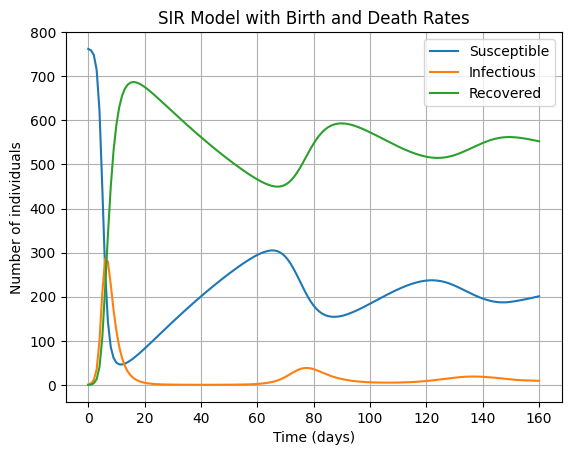

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
N = 763  # Total population
beta_f = 1.67  # Initial infection rate
gamma = 0.44  # Recovery rate
b = 0.01  # Birth rate (per individual per day)
a = 0.01  # Death rate (per individual per day)

# Convert beta_f to beta
beta = beta_f / N

# Initial conditions
initial_susceptible = N - 1  # S(0)
initial_infectious = 1       # I(0)
initial_recovered = 0        # R(0)
initial_conditions = [initial_susceptible, initial_infectious, initial_recovered]

# Time span and step size
time_span = [0, 160]  # Time from 0 to 160 days
step_size = 1

# SIR model differential equations with birth and death rates
def sir_model_with_birth_death(t, y, beta, gamma, b, a):
    S, I, R = y
    N = S + I + R
    dS = b * N - beta * S * I - a * S
    dI = beta * S * I - gamma * I - a * I
    dR = gamma * I - a * R
    return [dS, dI, dR]

# Solve the differential equations
solution = solve_ivp(
    fun=lambda t, y: sir_model_with_birth_death(t, y, beta, gamma, b, a),
    t_span=time_span,
    y0=initial_conditions,
    t_eval=np.arange(time_span[0], time_span[1] + step_size, step_size)
)

# Plot the solution
fig, ax = plt.subplots()
ax.plot(solution.t, solution.y[0], label='Susceptible')
ax.plot(solution.t, solution.y[1], label='Infectious')
ax.plot(solution.t, solution.y[2], label='Recovered')
ax.set(xlabel='Time (days)', ylabel='Number of individuals', title='SIR Model with Birth and Death Rates')
ax.legend()
ax.grid()
plt.show()